### Het Bernstein-Vazirani Algorithme
In dit Jupyter Notebook geven een een eenvoudige inleiding to het Bernstein-Vazirani Algorithme. 
Voor een volledige gedetaileerde uitleg verwijs ik naar het Qiskik Textbook. 
[Qiskit Textbook - Bernsstein-Vazirani] (https://qiskit.org/textbook/ch-algorithms/bernstein-vazirani.html)

In dit notebook ga ik niet in op de wiskundige bewijsvoering, maar houd ik het zeer praktisch. 

Het Bernstein-Vazirani algoritme dient om een geheime string (secret) snel te vinden. Een woordje uitleg.

Stel ik plaats een geheime string van 5 bits in een zwarte doos. Aan jou de opdracht om deze geheime string te vinden. Vele, denken dat ik in het slechtste geval 31 keer moet raden om de string te vinden. Stel immers dat je altijd de pech hebt om de verkeerde bit string te kiezen.

Dit is echter te pessimistisch. Met een Classical Computer vind je de string in 5 keer. Hoe dan wel? Wel, veronderstel dat ik als geheime string gekozen heb '11010'. Het enige wat jij hoeft te doen is vijf keer een bit-gewijze AND operatie uit te voeren (hierbij werken we van rechts naar links, van de minst-significante naar de mees-significante bit)

- Bekijk enkel de eerste bit: 11010 AND 00001 = 11010 --> de eerste bit moet dus '0' zijn want de AND operatie geeft '0'
- Bekijk enkel de tweede bit: 11010 AND 00010 = 11010 --> de tweede bit moet dus '1' zijn want de AND operatie geedt '1'
- Bekijk enkel de derde bit: 11010 AND 00100 = 11010 --> de derde bit moet dus '0' zijn want de AND operatie geeft '0'
- Enzoverder.

Zo vinden we in 5 "vragen" de juiste geheime bit string. 

En nu onze spectaculaire bewering: met een Quantum Circuit los je dit met één enkele vraagstelling direct correct op !

We houden het hier bij 5 qubits maar dit voorbeeldje kan je gerust eens uiwerkenn voor meer qubits. Misschien een Uistekende Oefening voor Thuis ("UOVT")?

In [1]:
# We starten met het importeren van het Qiskit framework, alsook de nodig visualizatie middelen.
from qiskit import *

In [2]:
%matplotlib inline

In [3]:
from qiskit.tools.visualization import plot_histogram

In [4]:
secretnumber = '11010'

In [12]:
# We creëren een Quantum Circuit met 5+1 = 6 Qubits en 5 Classical Bits.
ericcircuit = QuantumCircuit(5+1, 5)

# Dit is de creatie van het circuit dat het Bernstein-Vazirani ALgorithme realiseert.

# We zien een initializatie met Hadamard Gates en voor de bijkomende Qubit eerst nog een Bitflip
ericcircuit.h([0,1,2,3,4])
ericcircuit.x([5])
ericcircuit.h([5])
ericcircuit.barrier()

# Dit noemen we in Quantum Computing het "Oracle"
s = secretnumber[::-1] # reverse s to fit qiskit's qubit ordering
for q in range(5):
    if s[q] == '0':
        ericcircuit.i(q)
    else:
        ericcircuit.cx(q, 5)

ericcircuit.barrier()

ericcircuit.h([0,1,2,3,4])
ericcircuit.barrier()

ericcircuit.measure([0,1,2,3,4], [0,1,2,3,4])

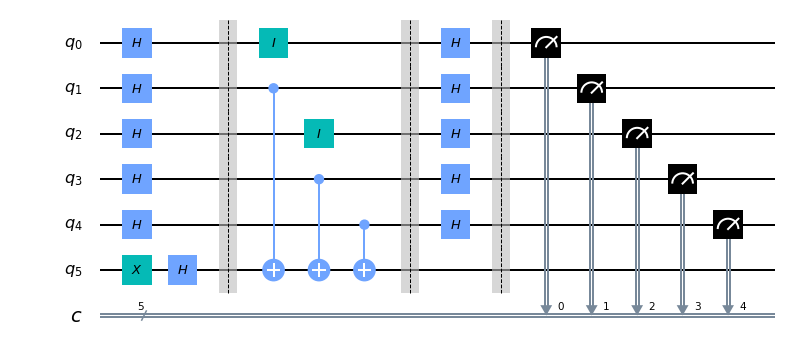

In [13]:
ericcircuit.draw(output = 'mpl')

In [14]:
ericsimulator = Aer.get_backend('qasm_simulator')
result = execute(ericcircuit, backend = ericsimulator, shots = 1).result()
counts = result.get_counts()
print(counts)

{'11010': 1}


We hadden slechts één shot nodig !
Aan jullie de opdracht: voer dit nu uit op een echte Quantum Computer ! 
 
Dit notebook kunnen jullie hier vinden: [Github van Eric Michiels] (https://github.com/EACMichiels/QiskitDutch)